In [1]:
# Importing all the Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
!pip install -U imbalanced-learn

  Using cached https://files.pythonhosted.org/packages/e5/4c/7557e1c2e791bd43878f8c82065bddc5798252084f26ef44527c02262af1/imbalanced_learn-0.4.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c1/1c/8fa5aefe23a2fc254e9faadc10a30052c63d92f05fb59127ff0e65e4171c/scikit_learn-0.20.2-cp36-cp36m-win_amd64.whl
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.19.1-py3.6.egg-info\\dependency_links.txt'
Consider using the `--user` option or check the permissions.



In [2]:
# For loading .arff files
from scipy.io import arff
# To perform mean imputation
from sklearn.preprocessing import Imputer
#To perform kFold Cross Validation
from sklearn.model_selection import KFold
# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 
# To analyze the type of missing data
import missingno as msno
# Library for performing k-NN and MICE imputations 
import fancyimpute

# To perform mean imputation
from sklearn.preprocessing import Imputer


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Impoting classification models
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
# Import metrics
import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [5]:
# Read the data
bank_data = pd.read_csv("bank_data.csv")

In [6]:
bank_data.shape

(24996, 65)

In [7]:
bank_data.head()
bank_data.info()
bank_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24996 entries, 0 to 24995
Data columns (total 65 columns):
Attr1     24990 non-null float64
Attr2     24990 non-null float64
Attr3     24990 non-null float64
Attr4     24910 non-null float64
Attr5     24951 non-null float64
Attr6     24990 non-null float64
Attr7     24990 non-null float64
Attr8     24931 non-null float64
Attr9     24988 non-null float64
Attr10    24990 non-null float64
Attr11    24086 non-null float64
Attr12    24910 non-null float64
Attr13    24913 non-null float64
Attr14    24990 non-null float64
Attr15    24968 non-null float64
Attr16    24931 non-null float64
Attr17    24931 non-null float64
Attr18    24990 non-null float64
Attr19    24912 non-null float64
Attr20    24913 non-null float64
Attr21    19595 non-null float64
Attr22    24990 non-null float64
Attr23    24913 non-null float64
Attr24    24495 non-null float64
Attr25    24990 non-null float64
Attr26    24931 non-null float64
Attr27    22269 non-null float64


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,24990.000000,24990.000000,24990.000000,24910.000000,2.495100e+04,24990.000000,24990.000000,24931.000000,24988.000000,24990.000000,...,2.499600e+04,2.491300e+04,24989.000000,2.494200e+04,24989.000000,2.322600e+04,24935.000000,2.491300e+04,24910.000000,24469.000000
mean,-0.025399,0.674995,0.048404,5.433537,-2.011619e+02,-0.121430,0.025566,8.587400,2.546445,0.617376,...,6.972576e+03,-4.530407e+01,-0.106698,4.901334e+01,2.479371,3.959328e+02,17.266378,1.613429e+03,8.776456,58.241379
std,4.834482,6.586872,6.573579,181.872588,2.929780e+04,8.790638,4.954985,297.912558,46.266459,16.707811,...,7.213189e+04,7.022098e+03,12.346187,7.028316e+03,213.995088,2.517297e+04,687.213040,1.661766e+05,56.788089,1296.960654
min,-463.890000,-2.421800,-479.960000,-0.403110,-2.722100e+06,-508.410000,-463.890000,-141.410000,-3.496000,-479.910000,...,-1.805200e+06,-1.108300e+06,-1236.300000,-1.986900e+02,-284.380000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-3.726500
25%,0.000445,0.289430,0.000000,1.006500,-5.758000e+01,-0.002932,0.002026,0.364790,1.018775,0.257872,...,8.762750e-02,7.431300e-03,0.008628,8.751700e-01,0.000000,5.461375e+00,4.551100,4.401100e+01,2.944900,2.196730
50%,0.044284,0.504040,0.174070,1.495850,-6.096100e+00,0.000000,0.053477,0.967690,1.210900,0.474620,...,8.757900e+02,4.974600e-02,0.117340,9.517900e-01,0.013621,9.613650e+00,6.680700,7.620729e+01,4.844703,4.207215
75%,0.126060,0.726772,0.383167,2.688350,4.581100e+01,0.062831,0.146965,2.460100,2.043200,0.688520,...,4.583973e+03,1.273900e-01,0.285450,9.931300e-01,0.293780,2.020900e+01,10.371000,1.259001e+02,8.417800,9.629100
max,94.280000,480.960000,22.769000,27146.000000,1.250100e+06,303.670000,186.430000,29636.000000,3876.100000,1027.200000,...,4.398400e+06,2.931500e+02,147.190000,1.108300e+06,23853.000000,3.660200e+06,108000.000000,2.501600e+07,7641.300000,127680.000000


In [8]:
# Convert the Target Variables to Numeric
bank_data["target"] = bank_data["target"].replace({'No':0, 'Yes':1})

In [9]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24996 entries, 0 to 24995
Data columns (total 65 columns):
Attr1     24990 non-null float64
Attr2     24990 non-null float64
Attr3     24990 non-null float64
Attr4     24910 non-null float64
Attr5     24951 non-null float64
Attr6     24990 non-null float64
Attr7     24990 non-null float64
Attr8     24931 non-null float64
Attr9     24988 non-null float64
Attr10    24990 non-null float64
Attr11    24086 non-null float64
Attr12    24910 non-null float64
Attr13    24913 non-null float64
Attr14    24990 non-null float64
Attr15    24968 non-null float64
Attr16    24931 non-null float64
Attr17    24931 non-null float64
Attr18    24990 non-null float64
Attr19    24912 non-null float64
Attr20    24913 non-null float64
Attr21    19595 non-null float64
Attr22    24990 non-null float64
Attr23    24913 non-null float64
Attr24    24495 non-null float64
Attr25    24990 non-null float64
Attr26    24931 non-null float64
Attr27    22269 non-null float64


In [10]:
# Find the Target value distribution
bank_data["target"].value_counts()

0    20830
1     4166
Name: target, dtype: int64

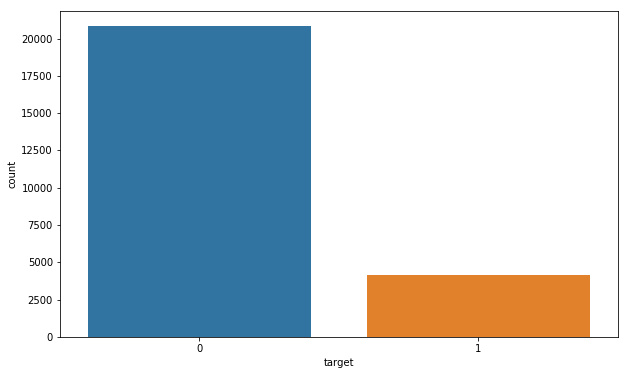

In [11]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x='target',data = bank_data)

In [12]:
# Missing Data
bank_data.isnull().mean()

Attr1     0.000240
Attr2     0.000240
Attr3     0.000240
Attr4     0.003441
Attr5     0.001800
Attr6     0.000240
Attr7     0.000240
Attr8     0.002600
Attr9     0.000320
Attr10    0.000240
Attr11    0.036406
Attr12    0.003441
Attr13    0.003321
Attr14    0.000240
Attr15    0.001120
Attr16    0.002600
Attr17    0.002600
Attr18    0.000240
Attr19    0.003361
Attr20    0.003321
Attr21    0.216075
Attr22    0.000240
Attr23    0.003321
Attr24    0.020043
Attr25    0.000240
Attr26    0.002600
Attr27    0.109097
Attr28    0.021083
Attr29    0.000240
Attr30    0.003321
            ...   
Attr36    0.000240
Attr37    0.458793
Attr38    0.000240
Attr39    0.003321
Attr40    0.003441
Attr41    0.014682
Attr42    0.003321
Attr43    0.003321
Attr44    0.003321
Attr45    0.070811
Attr46    0.003521
Attr47    0.006801
Attr48    0.000240
Attr49    0.003321
Attr50    0.002600
Attr51    0.000240
Attr52    0.006961
Attr53    0.021083
Attr54    0.021083
Attr55    0.000000
Attr56    0.003321
Attr57    0.

In [13]:
bank_data.shape

(24996, 65)

In [14]:
#Removing duplicate rows
bank_data = bank_data.drop_duplicates()

In [15]:
bank_data.shape

(20486, 65)

In [16]:
data_preprocessing = bank_data.copy()
data_preprocessing.drop(['target'], axis = 1, inplace = True)

In [17]:
normalized_data = (data_preprocessing - data_preprocessing.mean())/data_preprocessing.std()
normalized_data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.010523,-0.056417,0.028888,-0.019013,0.009241,0.055009,0.004753,-0.022263,-0.036006,0.010812,...,0.026522,0.007135,0.016189,-0.007554,-0.009990,-0.014836,-0.021041,-0.009855,-0.096895,-0.042566
1,0.009696,-0.061144,0.053769,-0.015948,0.006999,0.019265,0.003892,-0.020198,-0.002400,0.018163,...,-0.088364,0.007128,0.015230,-0.007549,-0.010492,-0.014829,-0.010199,-0.010310,-0.010793,-0.038787
2,0.006807,-0.019819,-0.031520,-0.025953,0.004888,0.019281,-0.000566,-0.026458,-0.003631,-0.003231,...,-0.157249,0.007130,0.015172,-0.007548,-0.009831,-0.014403,-0.003517,-0.010108,-0.070866,-0.041420
3,-0.034806,-0.057371,0.024849,-0.020137,0.021476,0.019281,-0.041263,-0.021308,0.025217,0.016209,...,-0.093820,0.007151,-0.005951,-0.007569,-0.010492,-0.013906,0.043653,-0.010372,0.033839,-0.039284
4,0.091254,-0.076722,0.105592,0.002544,0.018060,0.019281,0.108210,-0.011303,-0.019016,0.026227,...,-0.085097,0.007170,0.047472,-0.007589,-0.010492,NaN,-0.017254,-0.010369,0.031383,-0.027191


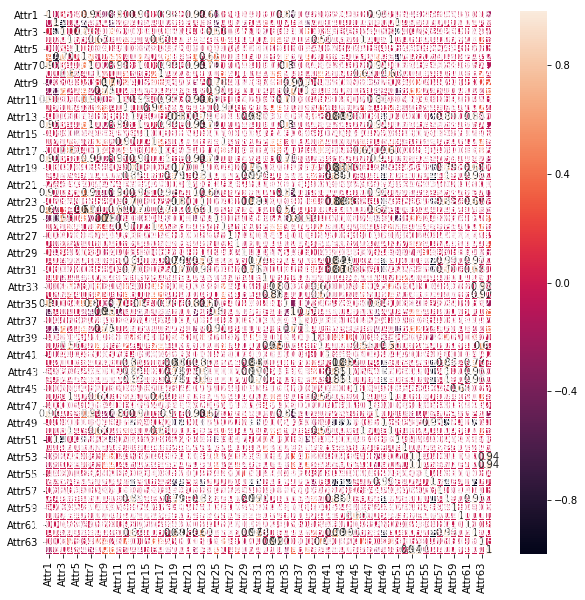

In [18]:
# Check for Correlation among all variables  
corr = normalized_data[normalized_data.columns].corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr,annot = True, linewidths=0.5, ax=ax)

In [19]:
# Check for Skewness in the dataset 
normalized_data.skew()

Attr1     -80.686995
Attr2      60.371459
Attr3     -60.688301
Attr4     124.061901
Attr5     -56.762620
Attr6     -38.235423
Attr7     -67.040587
Attr8      75.619517
Attr9      97.739562
Attr10     37.268228
Attr11    -73.334068
Attr12    -48.540494
Attr13    107.656012
Attr14    -67.040593
Attr15     79.701520
Attr16    -36.245888
Attr17     73.819926
Attr18    -64.731368
Attr19     72.412761
Attr20    142.852626
Attr21    111.747178
Attr22    -76.344072
Attr23     73.904725
Attr24    -10.340542
Attr25     46.980394
Attr26    -50.448470
Attr27     48.586952
Attr28     55.255899
Attr29     -0.162946
Attr30    140.195869
             ...    
Attr35    -87.317286
Attr36     92.527117
Attr37    101.529294
Attr38     37.265339
Attr39    -91.950301
Attr40     76.918219
Attr41     94.207178
Attr42     83.897927
Attr43    142.597981
Attr44    142.392482
Attr45     56.515611
Attr46    124.338939
Attr47     59.742438
Attr48    -82.813966
Attr49   -137.810273
Attr50    124.519671
Attr51     60

In [20]:
#!pip install fancyimpute 

In [21]:
# The above step shows us that there are a lot of rows which have missing data in at least one of the feature
# missing-data-rows correspond to more than 50% of the entire data.
#  Let us build sparsity Matrix
# To analyze the type of missing data
#import missingno as msno
# Library for performing k-NN and MICE imputations 

#import fancyimpute

In [22]:
bank_data.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'target'],
      dtype='object')

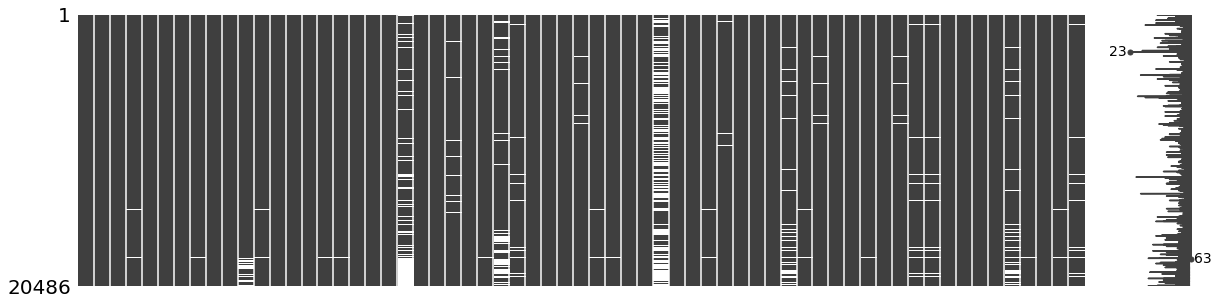

In [23]:
missing_data = bank_data.columns[bank_data.isnull().any()].tolist()
msno.matrix(bank_data[missing_data], figsize=(20,5))

In [24]:
#Generate heat map of missing values

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

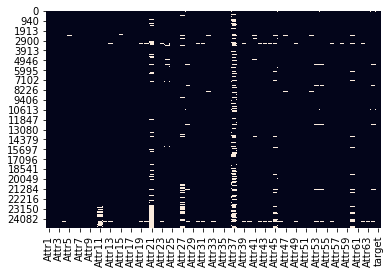

In [25]:
sns.heatmap(bank_data.isnull(), cbar=False)

In [26]:
#  we could notice a lot of sparsity for the featureAttr37 has the highest sparsity among all the features for all the dataframes. The feature Attr21 is sparse for some,

<BarContainer object of 65 artists>

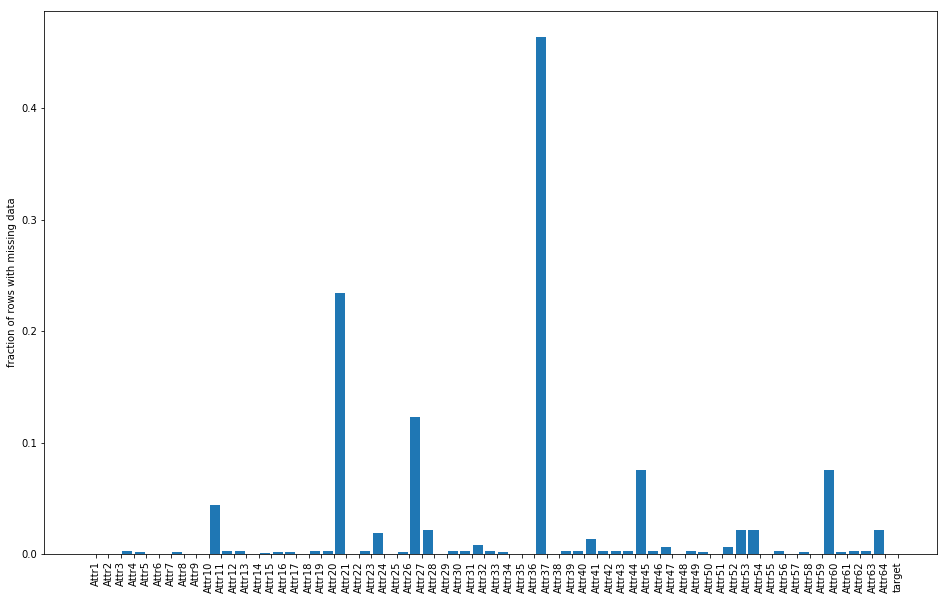

In [27]:
null_counts = bank_data.isnull().sum()/len(bank_data)
plt.figure(figsize=(16,10))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [28]:
# WE noticed that Attr37, Attr21, Attr60 and Attr27m attr45 had majority of missing values

In [29]:
# Data Imputation
# Impute missing values with mean Imputation
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(strategy="mean")
bank_data_mean_imputed = bank_data.copy()
bank_data_mean_imputed.iloc[:,0:64] = mean_imputer.fit_transform(bank_data_mean_imputed.iloc[:,0:64])

In [30]:
bank_data_mean_imputed.isnull().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
Attr6     0
Attr7     0
Attr8     0
Attr9     0
Attr10    0
Attr11    0
Attr12    0
Attr13    0
Attr14    0
Attr15    0
Attr16    0
Attr17    0
Attr18    0
Attr19    0
Attr20    0
Attr21    0
Attr22    0
Attr23    0
Attr24    0
Attr25    0
Attr26    0
Attr27    0
Attr28    0
Attr29    0
Attr30    0
         ..
Attr36    0
Attr37    0
Attr38    0
Attr39    0
Attr40    0
Attr41    0
Attr42    0
Attr43    0
Attr44    0
Attr45    0
Attr46    0
Attr47    0
Attr48    0
Attr49    0
Attr50    0
Attr51    0
Attr52    0
Attr53    0
Attr54    0
Attr55    0
Attr56    0
Attr57    0
Attr58    0
Attr59    0
Attr60    0
Attr61    0
Attr62    0
Attr63    0
Attr64    0
target    0
Length: 65, dtype: int64

In [31]:
bank_data_mean_imputed.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.036348,0.29370,0.22999,1.95800,49.611,0.323820,0.044336,2.17300,1.0571,0.63820,...,0.054040,0.056955,0.94596,0.084022,4.58460,2.1621,128.140,2.8484,1.2904,0
1,0.032515,0.25971,0.40845,2.57270,-6.682,-0.000148,0.040253,2.85050,2.1327,0.74029,...,0.000329,0.043921,0.98201,0.000000,4.77340,10.3800,44.448,8.2118,6.4267,0
2,0.019116,0.55685,-0.20328,0.56593,-59.719,0.000000,0.019116,0.79581,2.0933,0.44315,...,0.016719,0.043137,0.99131,0.110710,16.49700,15.4440,81.660,4.4698,2.8481,0
3,-0.173850,0.28684,0.20102,1.73250,356.930,0.000000,-0.173850,2.48630,3.0166,0.71316,...,0.178720,-0.243780,0.82306,0.000000,30.16800,51.1950,33.206,10.9920,5.7509,0
4,0.410710,0.14770,0.78015,6.28190,271.120,0.000000,0.534880,5.77040,1.6009,0.85230,...,0.326340,0.481890,0.66935,0.000000,412.62703,5.0324,33.676,10.8390,22.1870,0


In [32]:
# Split the Train and Test Data
from sklearn.model_selection import train_test_split
# Split the data into X and y
X = bank_data_mean_imputed.drop("target", axis=1)
y = bank_data_mean_imputed["target"]

In [33]:
## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

In [34]:
## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16388, 64)
(4098, 64)
(16388,)
(4098,)


In [35]:
## Scale the numeric attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,0:64])

X_train.iloc[:,0:64] = scaler.transform(X_train.iloc[:,0:64])
X_test.iloc[:,0:64] = scaler.transform(X_test.iloc[:,0:64])

C:\Users\Prashanth Yerabati\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [36]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

          Attr1     Attr2     Attr3     Attr4     Attr5     Attr6     Attr7  \
22342 -0.014354 -0.002115  0.000441 -0.022776  0.008292  0.015295 -0.021563   
23695  0.049113 -0.005349 -0.019184 -0.018853  0.008488  0.022258  0.052739   
9596   0.031223 -0.046988  0.040645 -0.018889  0.008860  0.058430  0.030507   
10278  0.008345 -0.108540  0.039498 -0.005329  0.043318  0.015295  0.002186   
5227   0.067779 -0.082730  0.126285 -0.010361  0.024791  0.015295  0.126960   

          Attr8     Attr9    Attr10    ...       Attr55    Attr56    Attr57  \
22342 -0.026577  0.040083 -0.012941    ...    -0.100588  0.007937  0.001524   
23695 -0.021008 -0.030996 -0.012450    ...    -0.150167  0.007959  0.041699   
9596  -0.024406 -0.031849 -0.000624    ...     0.373427  0.007952  0.030649   
10278 -0.004623 -0.060612  0.025012    ...     0.115271  0.007921  0.016603   
5227  -0.018693  0.091399  0.015814    ...    -0.093522  0.007951  0.040120   

         Attr58    Attr59    Attr60    Attr61    A

In [37]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
#Building Models
# Model1: LR
#Buliding Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_train=lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr= lr.predict(X_test)
y_prob_test_lr= lr.predict_proba(X_test)[:,1]
acc_train_lr =accuracy_score(y_true=y_train,y_pred=y_pred_train_lr)
acc_test_lr = accuracy_score(y_true=y_test,y_pred=y_pred_test_lr)                          
print("Train Logistic Accuracy :",accuracy_score(y_true=y_train,y_pred=y_pred_train_lr))
print("Test Logistic Accuracy :",accuracy_score(y_true=y_test,y_pred=y_pred_test_lr))


Train Logistic Accuracy : 0.7972907005125702
Test Logistic Accuracy : 0.8030746705710102


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [39]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_lr = confusion_matrix(y_test, y_pred_test_lr)
cr_lr = classification_report(y_test,y_pred_test_lr)
print("\n Confusion matrix \n", confusion_matrix_test_lr)
print("\n Classification report \n", classification_report(y_test,y_pred_test_lr))





 Confusion matrix 
 [[3256   31]
 [ 776   35]]

 Classification report 
              precision    recall  f1-score   support

          0       0.81      0.99      0.89      3287
          1       0.53      0.04      0.08       811

avg / total       0.75      0.80      0.73      4098



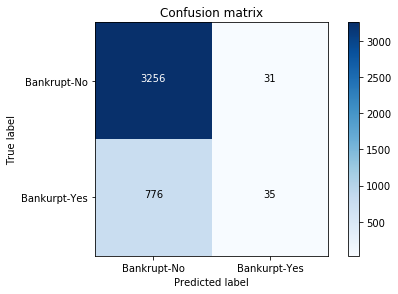

In [149]:
cclass_names = ['Bankrupt-No','Bankurpt-Yes']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_lr , classes=class_names, title='Confusion matrix')
plt.show()

In [42]:
Accuracy_Test_lr=(confusion_matrix_test_lr[0,0]+confusion_matrix_test_lr[1,1])/(confusion_matrix_test_lr[0,0]+confusion_matrix_test_lr[0,1]+confusion_matrix_test_lr[1,0]+confusion_matrix_test_lr[1,1])
TNR_Test_lr= confusion_matrix_test_lr[0,0]/(confusion_matrix_test_lr[0,0] +confusion_matrix_test_lr[0,1])
TPR_Test_lr= confusion_matrix_test_lr[1,1]/(confusion_matrix_test_lr[1,0] +confusion_matrix_test_lr[1,1])

print("Test TNR: ",TNR_Test_lr)
print("Test TPR: ",TPR_Test_lr)
print("Test Accuracy: ",Accuracy_Test_lr)

Test TNR:  0.9905689078186797
Test TPR:  0.04315659679408138
Test Accuracy:  0.8030746705710102


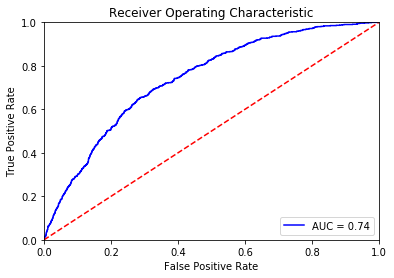

In [43]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_lr)
roc_auc_lr = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [46]:
print("Train Accuracy: ", acc_train_lr)
print("Test Accuracy: ", acc_test_lr)
print("Train Auc: ", roc_auc_lr)
print("Test TNR: ",TNR_Test_lr)
print("Test TPR: ",TPR_Test_lr)

Train Accuracy:  0.7972907005125702
Test Accuracy:  0.8030746705710102
Train Auc:  0.7395233323967638
Test TNR:  0.9905689078186797
Test TPR:  0.04315659679408138


In [45]:
# Model 2 SVM
from sklearn.svm import SVC
SVC = SVC(probability=True)
model_train_svc=SVC.fit(X_train, y_train)
y_pred_train_svc = SVC.predict(X_train)
y_pred_test_svc = SVC.predict(X_test)


In [47]:
y_prob_test_svc = SVC.predict_proba(X_test)[:,1]
acc_train_svc = accuracy_score(y_true=y_train,y_pred=y_pred_train_svc)
acc_test_svc = accuracy_score(y_true=y_test,y_pred=y_pred_test_svc)
print("Train SVC Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_svc))
print("Test SVC Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_svc))

Train SVC Accuracy: 0.7974737612887479
Test SVC Accuracy: 0.8011224987798926


In [48]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_svc = confusion_matrix(y_test, y_pred_test_svc)
print("\n Confusion matrix \n", confusion_matrix_test_svc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_svc))



 Confusion matrix 
 [[3283    4]
 [ 811    0]]

 Classification report 
              precision    recall  f1-score   support

          0       0.80      1.00      0.89      3287
          1       0.00      0.00      0.00       811

avg / total       0.64      0.80      0.71      4098



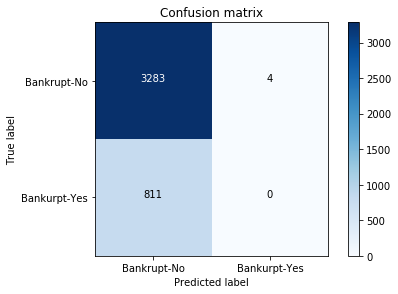

In [148]:
class_names = ['Bankrupt-No','Bankurpt-Yes']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_svc , classes=class_names, title='Confusion matrix')
plt.show()

In [50]:
Accuracy_Test=(confusion_matrix_test_svc[0,0]+confusion_matrix_test_svc[1,1])/(confusion_matrix_test_svc[0,0]+confusion_matrix_test_svc[0,1]+confusion_matrix_test_svc[1,0]+confusion_matrix_test_svc[1,1])
TNR_Test_svc= confusion_matrix_test_svc[0,0]/(confusion_matrix_test_svc[0,0] +confusion_matrix_test_svc[0,1])
TPR_Test_svc= confusion_matrix_test_svc[1,1]/(confusion_matrix_test_svc[1,0] +confusion_matrix_test_svc[1,1])

print("Test TNR: ",TNR_Test_svc)
print("Test TPR: ",TPR_Test_svc)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9987830848798296
Test TPR:  0.0
Test Accuracy:  0.8011224987798926


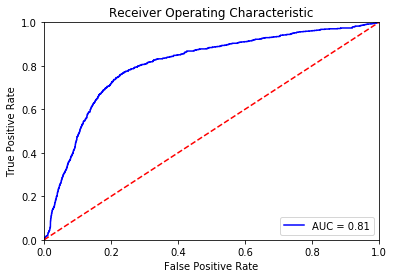

In [51]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_svc)
roc_auc_svc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_svc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [52]:
print("Train Accuracy: ", acc_train_svc)
print("Test Accuracy: ", acc_test_svc)
print("Train Auc: ", roc_auc_svc)
print("Test TNR: ",TNR_Test_svc)
print("Test TPR: ",TPR_Test_svc)

Train Accuracy:  0.7974737612887479
Test Accuracy:  0.8011224987798926
Train Auc:  0.8065093705090147
Test TNR:  0.9987830848798296
Test TPR:  0.0


In [53]:
#Building the Decision Tree Model
#Model3: DT

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_train_dtc = dtc.predict(X_train)
y_pred_test_dtc = dtc.predict(X_test)



In [54]:
y_prob_test_dtc= dtc.predict_proba(X_test)[:,1]
acc_train_dtc= accuracy_score(y_true=y_train,y_pred=y_pred_train_dtc)
acc_test_dtc = accuracy_score(y_true=y_test,y_pred=y_pred_test_dtc)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_dtc))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_dtc))

Train Decision Tree Accuracy: 1.0
Test Decision Tree Accuracy: 0.8997071742313324


In [55]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_dtc = confusion_matrix(y_test, y_pred_test_dtc)
print("\n Confusion matrix \n", confusion_matrix_test_dtc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_dtc))





 Confusion matrix 
 [[3097  190]
 [ 221  590]]

 Classification report 
              precision    recall  f1-score   support

          0       0.93      0.94      0.94      3287
          1       0.76      0.73      0.74       811

avg / total       0.90      0.90      0.90      4098



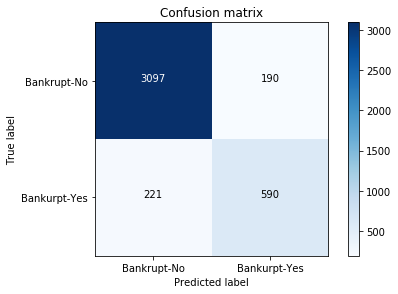

In [147]:
class_names = ['Bankrupt-No','Bankurpt-Yes']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_dtc , classes=class_names, title='Confusion matrix')
plt.show()

In [57]:
Accuracy_Test=(confusion_matrix_test_dtc[0,0]+confusion_matrix_test_dtc[1,1])/(confusion_matrix_test_dtc[0,0]+confusion_matrix_test_dtc[0,1]+confusion_matrix_test_dtc[1,0]+confusion_matrix_test_dtc[1,1])
TNR_Test_dtc= confusion_matrix_test_dtc[0,0]/(confusion_matrix_test_dtc[0,0] +confusion_matrix_test_dtc[0,1])
TPR_Test_dtc= confusion_matrix_test_dtc[1,1]/(confusion_matrix_test_dtc[1,0] +confusion_matrix_test_dtc[1,1])

print("Test TNR: ",TNR_Test_dtc)
print("Test TPR: ",TPR_Test_dtc)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9421965317919075
Test TPR:  0.7274969173859432
Test Accuracy:  0.8997071742313324


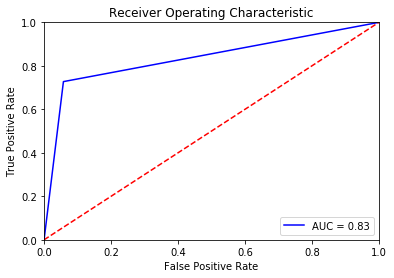

In [58]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_dtc)
roc_auc_dtc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_dtc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [59]:
print("Train Accuracy: ", acc_train_dtc)
print("Test Accuracy: ", acc_test_dtc)
print("Train Auc: ", roc_auc_dtc)
print("Test TNR: ",TNR_Test_dtc)
print("Test TPR: ",TPR_Test_dtc)

Train Accuracy:  1.0
Test Accuracy:  0.8997071742313324
Train Auc:  0.8348467245889253
Test TNR:  0.9421965317919075
Test TPR:  0.7274969173859432


In [60]:
#Building the RandomForest Classifier
#Model 4 RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=40,random_state=0)
model_train_rfc= rfc.fit(X_train,y_train)
y_pred_train_rfc = rfc.predict(X_train)
y_pred_test_rfc = rfc.predict(X_test)


In [61]:
y_prob_test_rfc= rfc.predict_proba(X_test)[:,1]
acc_train_rfc = accuracy_score(y_true=y_train,y_pred=y_pred_train_rfc)
acc_test_rfc = accuracy_score(y_true=y_test,y_pred=y_pred_test_rfc)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_rfc))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_rfc))

Train Decision Tree Accuracy: 0.9996338784476446
Test Decision Tree Accuracy: 0.9306979014153246


In [62]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_rfc = confusion_matrix(y_test, y_pred_test_rfc)
print("\n Confusion matrix \n", confusion_matrix_test_rfc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_rfc))





 Confusion matrix 
 [[3246   41]
 [ 243  568]]

 Classification report 
              precision    recall  f1-score   support

          0       0.93      0.99      0.96      3287
          1       0.93      0.70      0.80       811

avg / total       0.93      0.93      0.93      4098



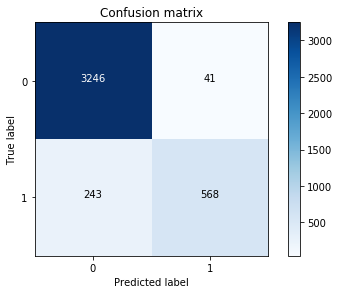

In [63]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_rfc , classes=class_names, title='Confusion matrix')
plt.show()

In [64]:
Accuracy_Test=(confusion_matrix_test_rfc[0,0]+confusion_matrix_test_rfc[1,1])/(confusion_matrix_test_rfc[0,0]+confusion_matrix_test_rfc[0,1]+confusion_matrix_test_rfc[1,0]+confusion_matrix_test_rfc[1,1])
TNR_Test_rfc= confusion_matrix_test_rfc[0,0]/(confusion_matrix_test_rfc[0,0] +confusion_matrix_test_rfc[0,1])
TPR_Test_rfc= confusion_matrix_test_rfc[1,1]/(confusion_matrix_test_rfc[1,0] +confusion_matrix_test_rfc[1,1])

print("Test TNR: ",TNR_Test_rfc)
print("Test TPR: ",TPR_Test_rfc)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9875266200182538
Test TPR:  0.7003699136868065
Test Accuracy:  0.9306979014153246


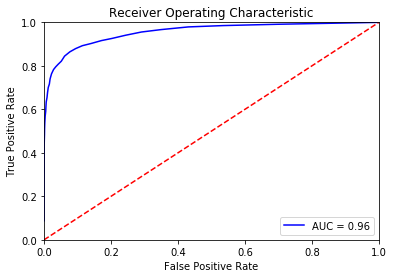

In [65]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_rfc)
roc_auc_rfc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_rfc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
print("Train Accuracy: ", acc_train_rfc)
print("Test Accuracy: ", acc_test_rfc)
print("Train Auc: ", roc_auc_rfc)
print("Test TNR: ",TNR_Test_rfc)
print("Test TPR: ",TPR_Test_rfc)

Train Accuracy:  0.9996338784476446
Test Accuracy:  0.9306979014153246
Train Auc:  0.9553695254293622
Test TNR:  0.9875266200182538
Test TPR:  0.7003699136868065


In [67]:
res = pd.DataFrame([y_pred_test_lr,y_pred_test_svc,y_pred_test_dtc,y_pred_test_rfc]).T

In [68]:
res.columns = ['Logistic','SVC','DTC','RFC']
res

,Logistic,SVC,DTC,RFC
0,0,0,1,1
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [69]:
from scipy.stats import mode

In [70]:
stack = np.array([y_pred_test_lr,y_pred_test_svc,y_pred_test_dtc,y_pred_test_rfc]).T

In [71]:
stacked_pred = mode(stack,axis=1)[0]
stacked_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [72]:
print("Decistion Trees accuracy", accuracy_score(y_test,y_pred_test_dtc))
print("Logistic Regression accuracy", accuracy_score(y_test, y_pred_test_lr))
print("SVC accuracy", accuracy_score(y_test, y_pred_test_svc))
print("RFC Accuracy", accuracy_score(y_test, y_pred_test_rfc))
print("Stacked Accuracy: ", accuracy_score(y_test,stacked_pred))

Decistion Trees accuracy 0.8997071742313324
Logistic Regression accuracy 0.8030746705710102
SVC accuracy 0.8011224987798926
RFC Accuracy 0.9306979014153246
Stacked Accuracy:  0.8052708638360175


In [73]:
## Model Builsing using Boosing
# Model 5: ADABOOST

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=100,
    learning_rate=1)
model_train_ada= ada.fit(X_train,y_train)
y_pred_train_ada = ada.predict(X_train)
y_pred_test_ada = ada.predict(X_test)

In [74]:
y_prob_test_ada= ada.predict_proba(X_test)[:,1]

acc_train_ada = accuracy_score(y_true=y_train,y_pred=y_pred_train_ada)
acc_test_ada = accuracy_score(y_true=y_test,y_pred=y_pred_test_ada)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_ada))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_ada))

Train Decision Tree Accuracy: 0.9638149865755431
Test Decision Tree Accuracy: 0.9380185456320156


In [75]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_ada= confusion_matrix(y_test, y_pred_test_ada)
print("\n Confusion matrix \n", confusion_matrix_test_ada)
print("\n Classification report \n", classification_report(y_test,y_pred_test_ada))



 Confusion matrix 
 [[3199   88]
 [ 166  645]]

 Classification report 
              precision    recall  f1-score   support

          0       0.95      0.97      0.96      3287
          1       0.88      0.80      0.84       811

avg / total       0.94      0.94      0.94      4098



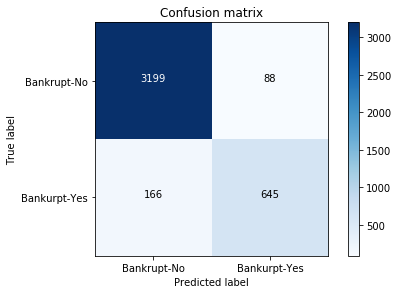

In [146]:
clclass_names = ['Bankrupt-No','Bankurpt-Yes']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_ada , classes=class_names, title='Confusion matrix')
plt.show()

In [77]:
Accuracy_Test=(confusion_matrix_test_ada[0,0]+confusion_matrix_test_ada[1,1])/(confusion_matrix_test_ada[0,0]+confusion_matrix_test_ada[0,1]+confusion_matrix_test_ada[1,0]+confusion_matrix_test_ada[1,1])
TNR_Test_ada= confusion_matrix_test_ada[0,0]/(confusion_matrix_test_ada[0,0] +confusion_matrix_test_ada[0,1])
TPR_Test_ada= confusion_matrix_test_ada[1,1]/(confusion_matrix_test_ada[1,0] +confusion_matrix_test_ada[1,1])

print("Test TNR: ",TNR_Test_ada)
print("Test TPR: ",TPR_Test_ada)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9732278673562519
Test TPR:  0.7953144266337855
Test Accuracy:  0.9380185456320156


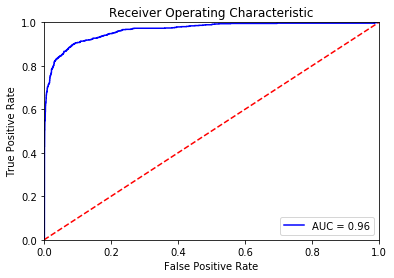

In [78]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_ada)
roc_auc_ada = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [79]:
print("Train Accuracy: ", acc_train_ada)
print("Test Accuracy: ", acc_test_ada)
print("Train Auc: ", roc_auc_ada)
print("Test TNR: ",TNR_Test_ada)
print("Test TPR: ",TPR_Test_ada)

Train Accuracy:  0.9638149865755431
Test Accuracy:  0.9380185456320156
Train Auc:  0.9642249837475809
Test TNR:  0.9732278673562519
Test TPR:  0.7953144266337855


In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [100, 150, 200],
              'learning_rate' : [0.1, 0.5, 0.9]}

Adaboost_model_clf = GridSearchCV(AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=-1)

In [84]:
%time Adaboost_model_clf.fit(X_train, y_train)
#Wall time: 53min 47s
#GridSearchCV(cv=None, error_score='raise',
#      estimator=AdaBoostClassifier(algorithm='SAMME.R',
#         base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
#            max_features=None, max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
#            splitter='best'),
#          learning_rate=1.0, n_estimators=50, random_state=None),
#       fit_params=None, iid=True, n_jobs=-1,
#       param_grid={'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.5, 0.9]},
#       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
#      scoring=None, verbose=0)

Wall time: 12min 38s


GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [85]:
# Find best model
final_ada_model = Adaboost_model_clf.best_estimator_
print (Adaboost_model_clf.best_score_, Adaboost_model_clf.best_params_)

0.9530406081216243 {'learning_rate': 0.5, 'n_estimators': 200}


In [80]:
# Build ada model using above Hyper parameters
## Model Builsing using Boosing
from sklearn.ensemble import AdaBoostClassifier
ada_final = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=200,
    learning_rate=0.5)
model_train_ada_final= ada_final.fit(X_train,y_train)
y_pred_train_ada_final = ada_final.predict(X_train)
y_pred_test_ada_final = ada_final.predict(X_test)

In [81]:
y_prob_test_ada_final= ada_final.predict_proba(X_test)[:,1]
acc_train_ada_final = accuracy_score(y_true=y_train,y_pred=y_pred_train_ada_final)
acc_test_ada_final = accuracy_score(y_true=y_test,y_pred=y_pred_test_ada_final)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_ada_final))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_ada_final))

Train Decision Tree Accuracy: 0.9686966072736148
Test Decision Tree Accuracy: 0.9433870180575891


In [82]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_ada_final= confusion_matrix(y_test, y_pred_test_ada_final)
print("\n Confusion matrix \n", confusion_matrix_test_ada_final)
print("\n Classification report \n", classification_report(y_test,y_pred_test_ada_final))


 Confusion matrix 
 [[3229   58]
 [ 174  637]]

 Classification report 
              precision    recall  f1-score   support

          0       0.95      0.98      0.97      3287
          1       0.92      0.79      0.85       811

avg / total       0.94      0.94      0.94      4098



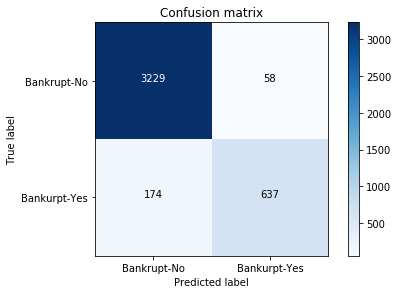

In [145]:
class_names = ['Bankrupt-No','Bankurpt-Yes']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_ada_final , classes=class_names, title='Confusion matrix')
plt.show()

In [84]:
Accuracy_Test=(confusion_matrix_test_ada_final[0,0]+confusion_matrix_test_ada_final[1,1])/(confusion_matrix_test_ada_final[0,0]+confusion_matrix_test_ada_final[0,1]+confusion_matrix_test_ada_final[1,0]+confusion_matrix_test_ada_final[1,1])
TNR_Test_ada_final= confusion_matrix_test_ada_final[0,0]/(confusion_matrix_test_ada_final[0,0] +confusion_matrix_test_ada_final[0,1])
TPR_Test_ada_final= confusion_matrix_test_ada_final[1,1]/(confusion_matrix_test_ada_final[1,0] +confusion_matrix_test_ada_final[1,1])

print("Test TNR: ",TNR_Test_ada_final)
print("Test TPR: ",TPR_Test_ada_final)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9823547307575297
Test TPR:  0.7854500616522812
Test Accuracy:  0.9433870180575891


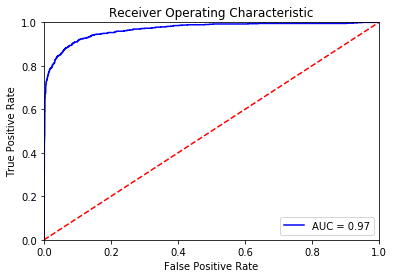

In [85]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_ada_final)
roc_auc_ada_final = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada_final)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [86]:
print("Train Accuracy: ", acc_train_ada_final)
print("Train Accuracy: ", acc_train_ada_final)
print("Train Auc: ", roc_auc_ada_final)
print("Test TNR: ",TNR_Test_ada_final)
print("Test TPR: ",TPR_Test_ada_final)

Train Accuracy:  0.9686966072736148
Train Accuracy:  0.9686966072736148
Train Auc:  0.9678689768047125
Test TNR:  0.9823547307575297
Test TPR:  0.7854500616522812


In [87]:
## Model Building uisng Gradient Boostin
# Model6: GB

from sklearn.ensemble import GradientBoostingClassifier
gbm =  GradientBoostingClassifier(n_estimators=150,
                                        learning_rate=0.1,
                                        subsample=0.8)
model_train_gbm= gbm.fit(X_train,y_train)
y_pred_train_gbm = gbm.predict(X_train)
y_pred_test_gbm = gbm.predict(X_test)

In [88]:
y_prob_test_gbm= gbm.predict_proba(X_test)[:,1]
acc_train_gbm = accuracy_score(y_true=y_train,y_pred=y_pred_train_gbm)
acc_test_gbm = accuracy_score(y_true=y_test,y_pred=y_pred_test_gbm)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_gbm))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_gbm))

Train Decision Tree Accuracy: 0.953258481815963
Test Decision Tree Accuracy: 0.9363103953147877


In [89]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_gbm= confusion_matrix(y_test, y_pred_test_gbm)
print("\n Confusion matrix \n", confusion_matrix_test_gbm)
print("\n Classification report \n", classification_report(y_test,y_pred_test_gbm))


 Confusion matrix 
 [[3234   53]
 [ 208  603]]

 Classification report 
              precision    recall  f1-score   support

          0       0.94      0.98      0.96      3287
          1       0.92      0.74      0.82       811

avg / total       0.94      0.94      0.93      4098



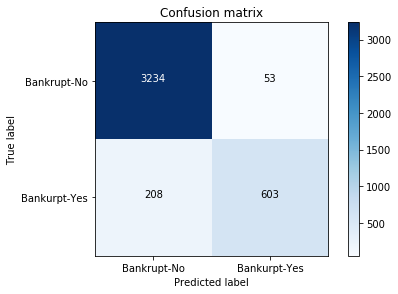

In [144]:
class_names = ['Bankrupt-No','Bankurpt-Yes']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_gbm , classes=class_names, title='Confusion matrix')
plt.show()

In [91]:
Accuracy_Test=(confusion_matrix_test_gbm[0,0]+confusion_matrix_test_gbm[1,1])/(confusion_matrix_test_gbm[0,0]+confusion_matrix_test_gbm[0,1]+confusion_matrix_test_gbm[1,0]+confusion_matrix_test_gbm[1,1])
TNR_Test_gbm= confusion_matrix_test_gbm[0,0]/(confusion_matrix_test_gbm[0,0] +confusion_matrix_test_gbm[0,1])
TPR_Test_gbm= confusion_matrix_test_gbm[1,1]/(confusion_matrix_test_gbm[1,0] +confusion_matrix_test_gbm[1,1])

print("Test TNR: ",TNR_Test_gbm)
print("Test TPR: ",TPR_Test_gbm)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9838758746577426
Test TPR:  0.7435265104808878
Test Accuracy:  0.9363103953147877


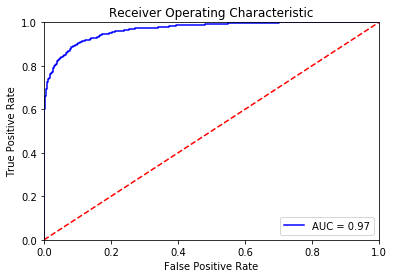

In [92]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_gbm)
roc_auc_gbm = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_gbm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [93]:
print("Train Accuracy: ", acc_train_gbm)
print("Test Accuracy: ", acc_test_gbm)
print("Train Auc: ", roc_auc_gbm)
print("Test TNR: ",TNR_Test_gbm)
print("Test TPR: ",TPR_Test_gbm)

Train Accuracy:  0.953258481815963
Test Accuracy:  0.9363103953147877
Train Auc:  0.9670281274699833
Test TNR:  0.9838758746577426
Test TPR:  0.7435265104808878


In [105]:
#Grid Search Cross validation
from sklearn.model_selection import GridSearchCV

# Model in use
GBM_Grid = GradientBoostingClassifier() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [100,150,200,250],
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.5,0.9]}
 
GBM_CV = GridSearchCV(estimator=GBM_Grid, param_grid=param_grid)

In [106]:
%time GBM_CV.fit(X_train, y_train)

Wall time: 1h 23min 55s


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 150, 200, 250], 'max_depth': [5, 10], 'learning_rate': [0.1, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [108]:
# Find best model
final_gbm_model = GBM_CV.best_estimator_
print (GBM_CV.best_score_, GBM_CV.best_params_)

0.9582916583316663 {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 250}


In [94]:
## Model Building uisng Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbm_final =  GradientBoostingClassifier(n_estimators=250,
                                        learning_rate=0.5,
                                        subsample=0.8,
                                        max_depth=5)
model_train_gbm_final= gbm_final.fit(X_train,y_train)
y_pred_train_gbm_final = gbm_final.predict(X_train)
y_pred_test_gbm_final = gbm_final.predict(X_test)

In [95]:
y_prob_test_gbm_final = gbm_final.predict_proba(X_test)[:,1]
acc_train_gbm_final = accuracy_score(y_true=y_train,y_pred=y_pred_train_gbm_final)
acc_test_gbm_final = accuracy_score(y_true=y_test,y_pred=y_pred_test_gbm_final)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_gbm_final))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_gbm_final))

Train Decision Tree Accuracy: 0.9999389797412741
Test Decision Tree Accuracy: 0.9482674475353832


In [96]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_gbm_final= confusion_matrix(y_test, y_pred_test_gbm_final)
print("\n Confusion matrix \n", confusion_matrix_test_gbm_final)
print("\n Classification report \n", classification_report(y_test,y_pred_test_gbm_final))


 Confusion matrix 
 [[3231   56]
 [ 156  655]]

 Classification report 
              precision    recall  f1-score   support

          0       0.95      0.98      0.97      3287
          1       0.92      0.81      0.86       811

avg / total       0.95      0.95      0.95      4098



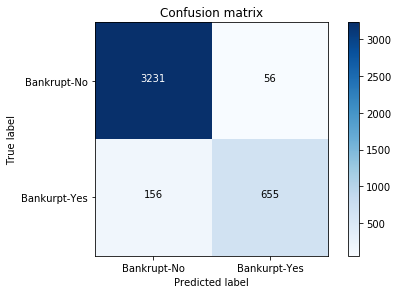

In [143]:
class_names = ['Bankrupt-No','Bankurpt-Yes']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_gbm_final , classes=class_names, title='Confusion matrix')
plt.show()

Accuracy_Test=(confusion_matrix_test_gbm_final[0,0]+confusion_matrix_test_gbm_final[1,1])/(confusion_matrix_test_gbm_final[0,0]+confusion_matrix_test_gbm[0,1]+confusion_matrix_test_gbm[1,0]+confusion_matrix_test_gbm_final[1,1])
TNR_Test_gbm_final= confusion_matrix_test_gbm_final[0,0]/(confusion_matrix_test_gbm_final[0,0] +confusion_matrix_test_gbm_final[0,1])
TPR_Test_gbm_final= confusion_matrix_test_gbm_final[1,1]/(confusion_matrix_test_gbm_final[1,0] +confusion_matrix_test_gbm_final[1,1])

print("Test TNR: ",TNR_Test_gbm_final)
print("Test TPR: ",TPR_Test_gbm_final)
print("Test Accuracy: ",Accuracy_Test)

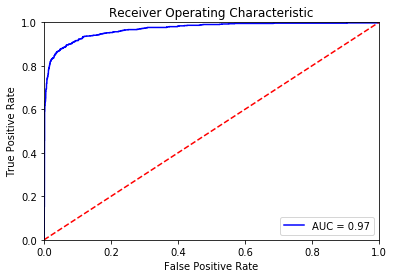

In [99]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_gbm_final)
roc_auc_gbm_final = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_gbm_final)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [100]:
print("Train Accuracy: ", acc_train_gbm_final)
print("Test Accuracy: ", acc_test_gbm_final)
print("Train Auc: ", roc_auc_gbm_final)
print("Test TNR: ",TNR_Test_gbm_final)
print("Test TPR: ",TPR_Test_gbm_final)

Train Accuracy:  0.9999389797412741
Test Accuracy:  0.9482674475353832
Train Auc:  0.9691678573853505
Test TNR:  0.9829631883176149
Test TPR:  0.8076448828606658


In [101]:
# Build Model XGBOOST
# MOdel 7 : XGBOOST
from xgboost import XGBClassifier
xgb = XGBClassifier()
model_train_xgb= xgb.fit(X_train,y_train)
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [102]:
y_prob_test_xgb= xgb.predict_proba(X_test)[:,1]
acc_train_xgb = accuracy_score(y_true=y_train,y_pred=y_pred_train_xgb)
acc_test_xgb = accuracy_score(y_true=y_test,y_pred=y_pred_test_xgb)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_xgb))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_xgb))

Train Decision Tree Accuracy: 0.9445936050768855
Test Decision Tree Accuracy: 0.9338701805758907


In [103]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_xgb= confusion_matrix(y_test, y_pred_test_xgb)
cr = classification_report(y_test,y_pred_test_xgb)
print("\n Confusion matrix \n", confusion_matrix_test_xgb)
print("\n Classification report \n", classification_report(y_test,y_pred_test_xgb))


 Confusion matrix 
 [[3235   52]
 [ 219  592]]

 Classification report 
              precision    recall  f1-score   support

          0       0.94      0.98      0.96      3287
          1       0.92      0.73      0.81       811

avg / total       0.93      0.93      0.93      4098



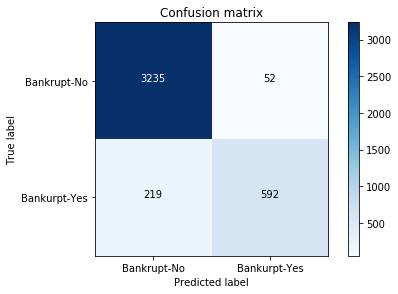

In [142]:
class_names = ['Bankrupt-No','Bankurpt-Yes']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_xgb , classes=class_names, title='Confusion matrix')
plt.show()

In [105]:
Accuracy_Test=(confusion_matrix_test_xgb[0,0]+confusion_matrix_test_xgb[1,1])/(confusion_matrix_test_xgb[0,0]+confusion_matrix_test_gbm[0,1]+confusion_matrix_test_xgb[1,0]+confusion_matrix_test_xgb[1,1])
TNR_Test_xgb= confusion_matrix_test_gbm[0,0]/(confusion_matrix_test_xgb[0,0] +confusion_matrix_test_xgb[0,1])
TPR_Test_xgb= confusion_matrix_test_gbm[1,1]/(confusion_matrix_test_xgb[1,0] +confusion_matrix_test_xgb[1,1])

print("Test TNR: ",TNR_Test_xgb)
print("Test TPR: ",TPR_Test_xgb)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9838758746577426
Test TPR:  0.7435265104808878
Test Accuracy:  0.9336423517931203


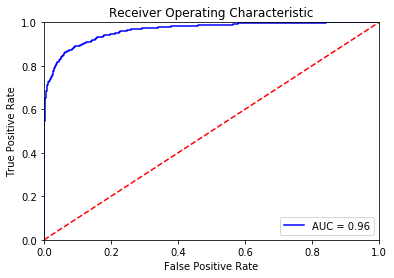

In [106]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_xgb)
roc_auc_xgb = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_xgb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [107]:
print("Train Accuracy: ", acc_train_xgb)
print("Test Accuracy: ", acc_test_xgb)
print("Train Auc: ", roc_auc_xgb)
print("Test TNR: ",TNR_Test_xgb)
print("Test TPR: ",TPR_Test_xgb)

Train Accuracy:  0.9445936050768855
Test Accuracy:  0.9338701805758907
Train Auc:  0.9642022885056665
Test TNR:  0.9838758746577426
Test TPR:  0.7435265104808878


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Model in use
xgb_Grid = xgb.XGBClassifier()
 
# Use a grid over parameters of interest
param_grid = { 
           "nthread":[4,5], 
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.05,0.2],
           "n_estimators": [3,5],
           "objective":["binary:logistic"]}
 
xgb_clf = GridSearchCV(estimator=xgb_Grid, param_grid=param_grid)

In [ ]:
%time xgb_clf.fit(X_train, y_train)

In [ ]:
# Find best model
final_gbm_model = xgb_clf.best_estimator_
print (xgb_clf.best_score_, xgb_clf.best_params_)

In [108]:
# Build bagging Model 
# Model 8: Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
bag = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model_train_bag= bag.fit(X_train,y_train)
y_pred_train_bag = bag.predict(X_train)
y_pred_test_bag = bag.predict(X_test)

In [109]:
y_prob_test_bag= bag.predict_proba(X_test)[:,1]

acc_train_bag = accuracy_score(y_true=y_train,y_pred=y_pred_train_bag)
acc_test_bag = accuracy_score(y_true=y_test,y_pred=y_pred_test_bag)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_bag))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_bag))

Train Decision Tree Accuracy: 0.20460092750793263
Test Decision Tree Accuracy: 0.19790141532454855


In [110]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_bag= confusion_matrix(y_test, y_pred_test_bag)
print("\n Confusion matrix \n", confusion_matrix_test_bag)
print("\n Classification report \n", classification_report(y_test,y_pred_test_bag))


 Confusion matrix 
 [[   0 3287]
 [   0  811]]

 Classification report 
              precision    recall  f1-score   support

          0       0.00      0.00      0.00      3287
          1       0.20      1.00      0.33       811

avg / total       0.04      0.20      0.07      4098



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


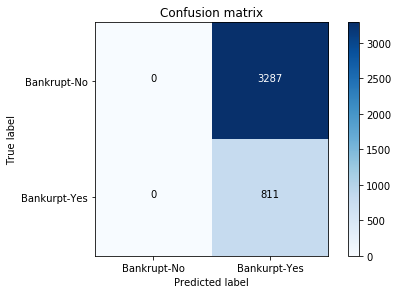

In [141]:
class_names = ['Bankrupt-No','Bankurpt-Yes']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_bag , classes=class_names, title='Confusion matrix')
plt.show()

In [112]:
Accuracy_Test=(confusion_matrix_test_bag[0,0]+confusion_matrix_test_bag[1,1])/(confusion_matrix_test_bag[0,0]+confusion_matrix_test_bag[0,1]+confusion_matrix_test_bag[1,0]+confusion_matrix_test_bag[1,1])
TNR_Test_bag= confusion_matrix_test_bag[0,0]/(confusion_matrix_test_bag[0,0] +confusion_matrix_test_bag[0,1])
TPR_Test_bag= confusion_matrix_test_bag[1,1]/(confusion_matrix_test_bag[1,0] +confusion_matrix_test_bag[1,1])

print("Test TNR: ",TNR_Test_bag)
print("Test TPR: ",TPR_Test_bag)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.0
Test TPR:  1.0
Test Accuracy:  0.19790141532454855


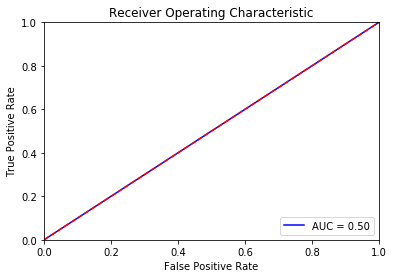

In [113]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_bag)
roc_auc_bag = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_bag)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [114]:
print("Train Accuracy: ", acc_train_bag)
print("Test Accuracy: ", acc_test_bag)
print("Train Auc: ", roc_auc_bag)
print("Test TNR: ",TNR_Test_bag)
print("Test TPR: ",TPR_Test_bag)

Train Accuracy:  0.20460092750793263
Test Accuracy:  0.19790141532454855
Train Auc:  0.5
Test TNR:  0.0
Test TPR:  1.0


In [115]:
# Build Balanced bagging classifier model
# Model9 : Balanced Bagging
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn import tree
bbc = BalancedBaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model_train_bbc= bbc.fit(X_train,y_train)
y_pred_train_bbc = bbc.predict(X_train)
y_pred_test_bbc = bbc.predict(X_test)

In [116]:
y_prob_test_bbc= bbc.predict_proba(X_test)[:,1]

acc_train_bbc = accuracy_score(y_true=y_train,y_pred=y_pred_train_bbc)
acc_test_bbc = accuracy_score(y_true=y_test,y_pred=y_pred_test_bbc) 

print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_bbc))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_bbc))

Train Decision Tree Accuracy: 0.9517939956065413
Test Decision Tree Accuracy: 0.8938506588579795


In [117]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_bbc= confusion_matrix(y_test, y_pred_test_bbc)
print("\n Confusion matrix \n", confusion_matrix_test_bbc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_bbc))


 Confusion matrix 
 [[2979  308]
 [ 127  684]]

 Classification report 
              precision    recall  f1-score   support

          0       0.96      0.91      0.93      3287
          1       0.69      0.84      0.76       811

avg / total       0.91      0.89      0.90      4098



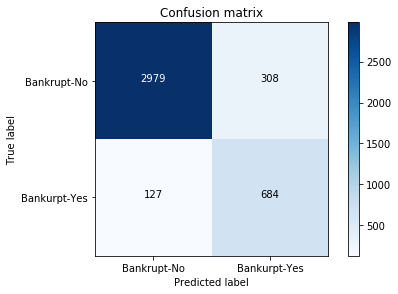

In [138]:
class_names = ['Bankrupt-No','Bankurpt-Yes']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_bbc , classes=class_names, title='Confusion matrix')
plt.show()

In [119]:
Accuracy_Test=(confusion_matrix_test_bbc[0,0]+confusion_matrix_test_bbc[1,1])/(confusion_matrix_test_bbc[0,0]+confusion_matrix_test_bbc[0,1]+confusion_matrix_test_bbc[1,0]+confusion_matrix_test_bbc[1,1])
TNR_Test_bbc= confusion_matrix_test_bbc[0,0]/(confusion_matrix_test_bbc[0,0] +confusion_matrix_test_bbc[0,1])
TPR_Test_bbc= confusion_matrix_test_bbc[1,1]/(confusion_matrix_test_bbc[1,0] +confusion_matrix_test_bbc[1,1])

print("Test TNR: ",TNR_Test_bbc)
print("Test TPR: ",TPR_Test_bbc)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9062975357468817
Test TPR:  0.843403205918619
Test Accuracy:  0.8938506588579795


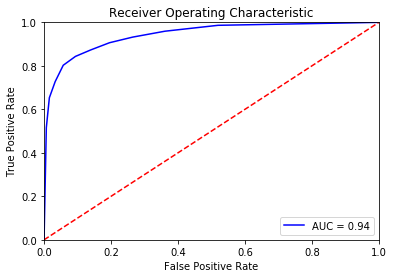

In [120]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_bbc)
roc_auc_bbc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_bbc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [121]:
print("Train Accuracy: ", acc_train_bbc)
print("Test Accuracy: ", acc_test_bbc)
print("Train Auc: ", roc_auc_bbc)
print("Test TNR: ",TNR_Test_bbc)
print("Test TPR: ",TPR_Test_bbc)

Train Accuracy:  0.9517939956065413
Test Accuracy:  0.8938506588579795
Train Auc:  0.9427361533703184
Test TNR:  0.9062975357468817
Test TPR:  0.843403205918619


In [122]:
## Aplying SMOTE
# Find the Target value distribution
bank_data["target"].value_counts()

0    16322
1     4164
Name: target, dtype: int64

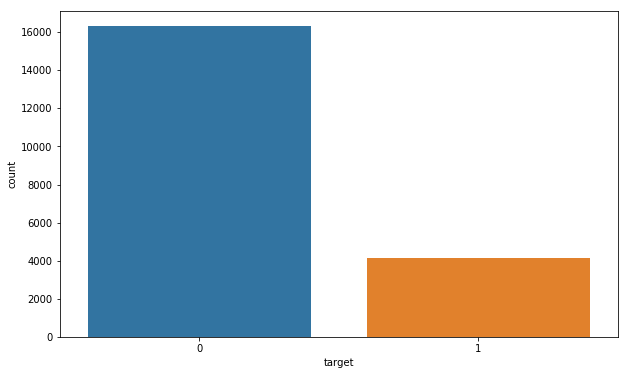

In [123]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x='target',data = bank_data)

In [124]:
# Data Imputation
# Impute missing values with mean Imputation
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(strategy="mean")
bank_data_mean_imputed1 = bank_data.copy()
bank_data_mean_imputed1.iloc[:,0:64] = mean_imputer.fit_transform(bank_data_mean_imputed.iloc[:,0:64])

In [178]:
bank_data_mean_imputed1.head()
bank_data_mean_imputed1.isnull().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
Attr6     0
Attr7     0
Attr8     0
Attr9     0
Attr10    0
Attr11    0
Attr12    0
Attr13    0
Attr14    0
Attr15    0
Attr16    0
Attr17    0
Attr18    0
Attr19    0
Attr20    0
Attr21    0
Attr22    0
Attr23    0
Attr24    0
Attr25    0
Attr26    0
Attr27    0
Attr28    0
Attr29    0
Attr30    0
         ..
Attr36    0
Attr37    0
Attr38    0
Attr39    0
Attr40    0
Attr41    0
Attr42    0
Attr43    0
Attr44    0
Attr45    0
Attr46    0
Attr47    0
Attr48    0
Attr49    0
Attr50    0
Attr51    0
Attr52    0
Attr53    0
Attr54    0
Attr55    0
Attr56    0
Attr57    0
Attr58    0
Attr59    0
Attr60    0
Attr61    0
Attr62    0
Attr63    0
Attr64    0
target    0
Length: 65, dtype: int64

In [125]:
# Split the Train and Test Data
from sklearn.model_selection import train_test_split
# Split the data into X and y
X = bank_data_mean_imputed1.drop("target", axis=1)
y = bank_data_mean_imputed1["target"]

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (20486, 64)
Shape of y: (20486,)


In [126]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=1)

print("Number transactions X_train dataset: ", X_train1.shape)
print("Number transactions y_train dataset: ", y_train1.shape)
print("Number transactions X_test dataset: ", X_test1.shape)
print("Number transactions y_test dataset: ", y_test1.shape)

Number transactions X_train dataset:  (16388, 64)
Number transactions y_train dataset:  (16388,)
Number transactions X_test dataset:  (4098, 64)
Number transactions y_test dataset:  (4098,)


In [127]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train1==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train1==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train1, y_train1)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 3353
Before OverSampling, counts of label '0': 13035 

After OverSampling, the shape of train_X: (26070, 64)
After OverSampling, the shape of train_y: (26070,) 

After OverSampling, counts of label '1': 13035
After OverSampling, counts of label '0': 13035


In [128]:
## Model Builsing using Boosing
# Model 10:ADABOOST with SMOTE
from sklearn.ensemble import AdaBoostClassifier
ada_smote = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=100,
    learning_rate=1)
model_train_ada= ada_smote.fit(X_train_res,y_train_res)
y_pred_train_ada_smote = ada_smote.predict(X_train_res)
y_pred_test_ada_smote = ada_smote.predict(X_test1)

In [129]:
y_prob_test_ada_smote= ada_smote.predict_proba(X_test1)[:,1]

acc_train_ada_smote = accuracy_score(y_true=y_train_res,y_pred=y_pred_train_ada_smote)
acc_test_ada_smote = accuracy_score(y_true=y_test1,y_pred=y_pred_test_ada_smote)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train_res,y_pred=y_pred_train_ada_smote))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test1,y_pred=y_pred_test_ada_smote))

Train Decision Tree Accuracy: 0.9630609896432681
Test Decision Tree Accuracy: 0.9275256222547584


In [130]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_ada_smote= confusion_matrix(y_test, y_pred_test_ada_smote)
print("\n Confusion matrix \n", confusion_matrix_test_ada_smote)
print("\n Classification report \n", classification_report(y_test,y_pred_test_ada_smote))



 Confusion matrix 
 [[3125  162]
 [ 135  676]]

 Classification report 
              precision    recall  f1-score   support

          0       0.96      0.95      0.95      3287
          1       0.81      0.83      0.82       811

avg / total       0.93      0.93      0.93      4098



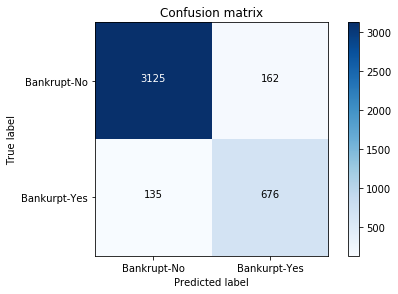

In [140]:
class_names = ['Bankrupt-No','Bankurpt-Yes']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_ada_smote , classes=class_names, title='Confusion matrix')
plt.show()

In [132]:
Accuracy_Test=(confusion_matrix_test_ada_smote[0,0]+confusion_matrix_test_ada_smote[1,1])/(confusion_matrix_test_ada_smote[0,0]+confusion_matrix_test_ada_smote[0,1]+confusion_matrix_test_ada_smote[1,0]+confusion_matrix_test_ada_smote[1,1])
TNR_Test_ada_smote= confusion_matrix_test_ada_smote[0,0]/(confusion_matrix_test_ada_smote[0,0] +confusion_matrix_test_ada_smote[0,1])
TPR_Test_ada_smote= confusion_matrix_test_ada_smote[1,1]/(confusion_matrix_test_ada_smote[1,0] +confusion_matrix_test_ada_smote[1,1])

print("Test TNR: ",TNR_Test_ada_smote)
print("Test TPR: ",TPR_Test_ada_smote)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9507149376331001
Test TPR:  0.8335388409371147
Test Accuracy:  0.9275256222547584


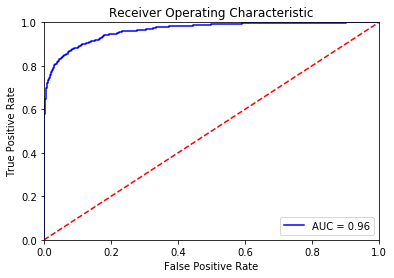

In [133]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_ada_smote)
roc_auc_ada_smote = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada_smote)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [134]:
print("Train Accuracy: ", acc_train_ada_smote)
print("Test Accuracy: ", acc_test_ada_smote)
print("Train Auc: ", roc_auc_ada_smote)
print("Test TNR: ",TNR_Test_ada_smote)
print("Test TPR: ",TPR_Test_ada_smote)

Train Accuracy:  0.9630609896432681
Test Accuracy:  0.9275256222547584
Train Auc:  0.9633094839477117
Test TNR:  0.9507149376331001
Test TPR:  0.8335388409371147


In [135]:
from prettytable import PrettyTable
t = PrettyTable(['Name','Train_accuracy', 'Test_accuracy', 'Roc_Auc', 'Test TNR', 'Test TPR'])
t.add_row(["Logistic Regression",acc_train_lr,acc_test_lr,roc_auc_lr,TNR_Test_lr,TPR_Test_lr])
t.add_row(["SVC",acc_train_svc,acc_test_svc,roc_auc_svc,TNR_Test_svc,TPR_Test_svc])
t.add_row(["DTC",acc_train_dtc,acc_test_dtc,roc_auc_dtc,TNR_Test_dtc,TPR_Test_dtc])
t.add_row(["RFC",acc_train_rfc,acc_test_rfc,roc_auc_rfc,TNR_Test_rfc,TPR_Test_rfc])
t.add_row(["ADABOOST_BASIC",acc_train_ada,acc_test_ada,roc_auc_ada,TNR_Test_ada,TPR_Test_ada])
t.add_row(["ADABOOST FINAL",acc_train_ada_final,acc_test_ada_final,roc_auc_ada_final,TNR_Test_ada_final,TPR_Test_ada_final])
t.add_row(["GBC BASIC",acc_train_gbm,acc_test_gbm,roc_auc_gbm,TNR_Test_gbm,TPR_Test_gbm])
t.add_row(["GBC FINAL",acc_train_gbm_final,acc_test_gbm_final,roc_auc_gbm_final,TNR_Test_gbm_final,TPR_Test_gbm_final])
t.add_row(["XGBOOST BASIC",acc_train_xgb,acc_test_xgb,roc_auc_xgb,TNR_Test_xgb,TPR_Test_xgb])
#t.add_row(["XGBOOST FINAL",acc_train_xgb_final,acc_test_xgb_final,roc_auc_xgb_final,TNR_Test_xgb_final,TPR_Test_xgb_final])
t.add_row(["BAGGING",acc_train_bag,acc_test_bag,roc_auc_bag,TNR_Test_bag,TPR_Test_bag])
t.add_row(["BALANCED BAGGING",acc_train_bbc,acc_test_bbc,roc_auc_bbc,TNR_Test_bbc,TPR_Test_bbc])
t.add_row(["SMOTE ADABOOST",acc_train_ada_smote,acc_test_ada_smote,roc_auc_ada_smote,TNR_Test_ada_smote,TPR_Test_ada_smote])
 
print(t.get_string(title="Results")) 

+---------------------+---------------------+---------------------+--------------------+--------------------+---------------------+
|         Name        |    Train_accuracy   |    Test_accuracy    |      Roc_Auc       |      Test TNR      |       Test TPR      |
+---------------------+---------------------+---------------------+--------------------+--------------------+---------------------+
| Logistic Regression |  0.7972907005125702 |  0.8030746705710102 | 0.7395233323967638 | 0.9905689078186797 | 0.04315659679408138 |
|         SVC         |  0.7974737612887479 |  0.8011224987798926 | 0.8065093705090147 | 0.9987830848798296 |         0.0         |
|         DTC         |         1.0         |  0.8997071742313324 | 0.8348467245889253 | 0.9421965317919075 |  0.7274969173859432 |
|         RFC         |  0.9996338784476446 |  0.9306979014153246 | 0.9553695254293622 | 0.9875266200182538 |  0.7003699136868065 |
|    ADABOOST_BASIC   |  0.9638149865755431 |  0.9380185456320156 | 0.964224

In [136]:
print("\n Classification report Logistic Classification \n", classification_report(y_test,y_pred_test_lr))
print("\n Classification report  SVC \n", classification_report(y_test,y_pred_test_svc))
print("\n Classification report DTC \n", classification_report(y_test,y_pred_test_dtc))
print("\n Classification report RFC \n", classification_report(y_test,y_pred_test_rfc))
print("\n Classification report ADABOOST BASIC\n", classification_report(y_test,y_pred_test_ada))
print("\n Classification report ADABOOST FINAL \n", classification_report(y_test,y_pred_test_ada_final))
print("\n Classification report GBM BASIC \n", classification_report(y_test,y_pred_test_gbm))
print("\n Classification report GBM FINAL \n", classification_report(y_test,y_pred_test_gbm_final))
print("\n Classification report XGBOOST BASIC \n", classification_report(y_test,y_pred_test_xgb))
#print("\n Classification report XGBOOST FINAL \n", classification_report(y_test,y_pred_test_xgb_final))
print("\n Classification report BAGGING \n", classification_report(y_test,y_pred_test_bag))
print("\n Classification report BALANCED BAGING \n", classification_report(y_test,y_pred_test_bbc))
print("\n Classification report ADAMOOST & SMOTE \n", classification_report(y_test,y_pred_test_ada_smote))


 Classification report Logistic Classification 
              precision    recall  f1-score   support

          0       0.81      0.99      0.89      3287
          1       0.53      0.04      0.08       811

avg / total       0.75      0.80      0.73      4098


 Classification report  SVC 
              precision    recall  f1-score   support

          0       0.80      1.00      0.89      3287
          1       0.00      0.00      0.00       811

avg / total       0.64      0.80      0.71      4098


 Classification report DTC 
              precision    recall  f1-score   support

          0       0.93      0.94      0.94      3287
          1       0.76      0.73      0.74       811

avg / total       0.90      0.90      0.90      4098


 Classification report RFC 
              precision    recall  f1-score   support

          0       0.93      0.99      0.96      3287
          1       0.93      0.70      0.80       811

avg / total       0.93      0.93      0.93      4098


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
